In [1]:
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Updated to newest dataset
DATASET_PATH = os.path.join(".", "training_dataset_V3.csv")
data = pd.read_csv(DATASET_PATH)
data.head()

,Unnamed: 0,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,...,most_recent_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
0,0,2019-12-16,Monday,2019,21350,U0109015,Owner Operator,CA&F TRUCKING,Maywood,CA,...,2021-02-17,2019-12-16,2,0,438,438,0,45,45,483
1,1,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,...,2021-02-03,2021-01-15,1,2,72,74,0,1,1,75
2,2,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,...,2020-09-25,2019-12-26,1,0,180,180,0,2,2,182
3,3,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,...,2021-02-17,2021-02-10,3,0,0,0,0,0,0,62
4,4,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,...,2017-10-11,2017-07-24,2,57,0,57,314,0,314,371


In [3]:
'''
# data V2
OLDDATASET_PATH = os.path.join(".", "training_data_cleaned.csv")
olddata = pd.read_csv(OLDDATASET_PATH)
olddata.head()
'''

'\n# data V2\nOLDDATASET_PATH = os.path.join(".", "training_data_cleaned.csv")\nolddata = pd.read_csv(OLDDATASET_PATH)\nolddata.head()\n'

In [4]:
# drop unnecessary columns
data = data.drop('Unnamed: 0', axis=1)

In [5]:
# aggregate columns based on driver ID and keep only most recent entry
data = data.groupby('id_driver').apply(lambda x: x[x['dt'] == x['dt'].max()])

## Part 1

In [6]:
# we convert the column 'most_recent_load_date' into datetime objects in order to calculate the 75th percentile 
most_recent_load_date_datetime = [datetime.datetime.strptime(x, '%Y-%m-%d') for x in data['most_recent_load_date']]
data['most_recent_load_date'] = most_recent_load_date_datetime

In [7]:
# generate labels based on 75th percentile of 'total_loads' and 'most_recent_load_date'

labels = []

cutoff_date = data['most_recent_load_date'].quantile(0.75)

cutoff_loads = data['total_loads'].quantile(0.75)

for index, row in data.iterrows():
    if(row['total_loads'] >= cutoff_loads and row['most_recent_load_date'] >= cutoff_date):
        labels.append(1)
    else:
        labels.append(0)
        
data['label'] = labels

In [8]:
data['label'].value_counts()

0    4587
1     707
Name: label, dtype: int64

## Part 2

In [9]:
data = data.drop(['total_loads', 'most_recent_load_date'], axis=1)

## Part 3

In [11]:
data.describe(include='all')

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,first_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,label
count,5294,5294,5294.000000,5294.000000,5294,5294,5287,5282,5282,5294,...,5294,5294,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000,5294.000000
unique,1418,7,NaN,NaN,2573,2,2491,520,40,16,...,1458,1418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-02-17,Wednesday,NaN,NaN,C0094651,Fleet,NFS asset Drayage,Los Angeles,CA,"[""dryvan""]",...,2020-06-12,2021-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,161,1008,NaN,NaN,217,4090,217,922,4592,3166,...,23,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2018.712883,17725.917643,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.266528,4.721572,9.240461,13.962032,15.128636,2.382509,17.511145,0.133547
std,NaN,NaN,1.435007,11626.759150,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.977059,20.700849,59.859671,64.941889,99.392557,17.737119,100.756506,0.340198
min,NaN,NaN,2015.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2018.000000,8049.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,2019.000000,15214.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,NaN,NaN,2020.000000,29289.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,2.000000,0.000000,4.000000,4.000000,0.000000,5.000000,0.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5294 entries, (20, 79771) to (38125, 4096)
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        5294 non-null   object 
 1   weekday                   5294 non-null   object 
 2   year                      5294 non-null   int64  
 3   id_driver                 5294 non-null   int64  
 4   id_carrier_number         5294 non-null   object 
 5   dim_carrier_type          5294 non-null   object 
 6   dim_carrier_company_name  5287 non-null   object 
 7   home_base_city            5282 non-null   object 
 8   home_base_state           5282 non-null   object 
 9   carrier_trucks            5294 non-null   object 
 10  num_trucks                5252 non-null   float64
 11  interested_in_drayage     5294 non-null   object 
 12  port_qualified            5294 non-null   object 
 13  signup_source             5294 non-null   ob

### Findings:
About 25% of the data is missing in features ts_first_approved and days_signup_to_approval, and there is very little data available for the dim_preferred_lanes feature.


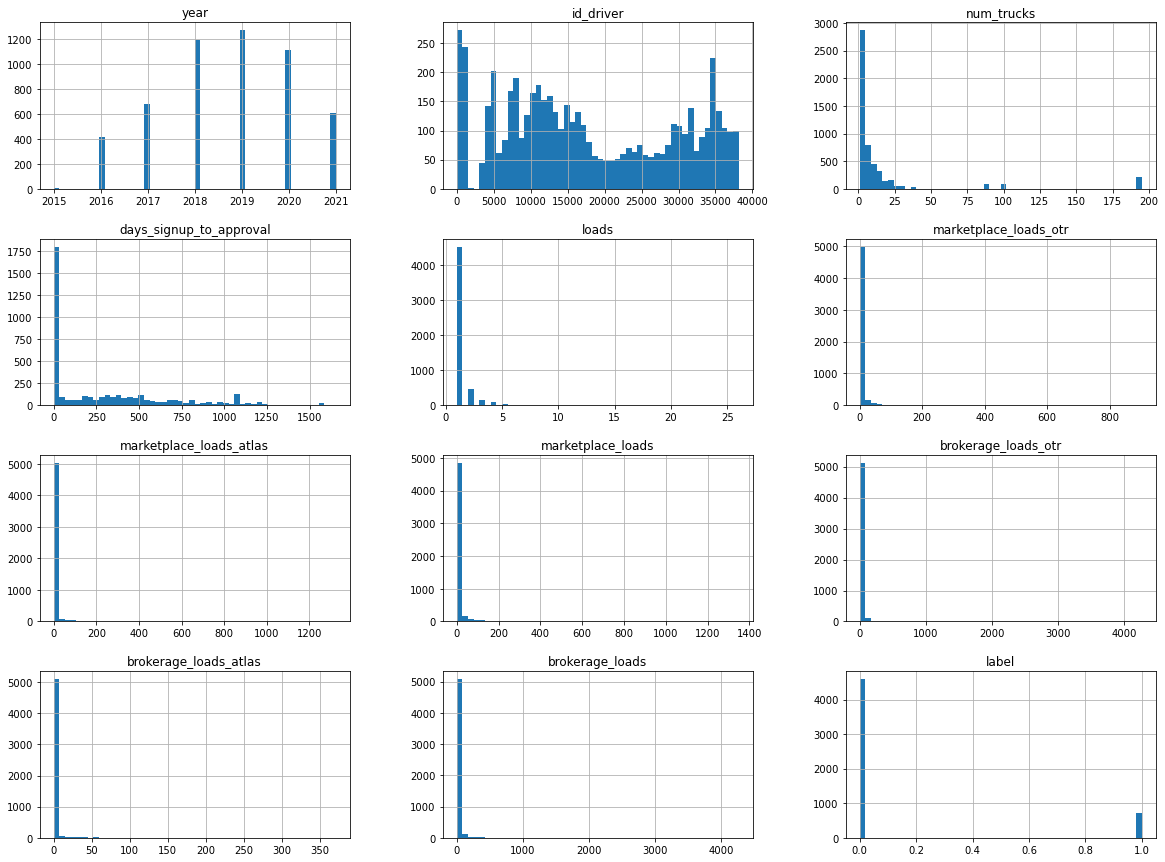

In [13]:
#int/float valued features
data.hist(bins=50, figsize=(20,15))
plt.show()

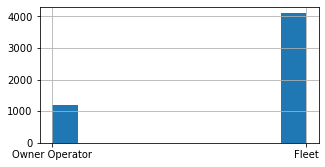

In [14]:
#some other plottable categorical features
data['dim_carrier_type'].hist(bins=10, figsize=(5,2.5))
plt.show()

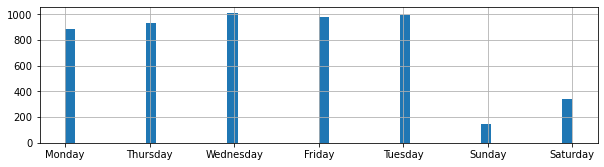

In [15]:
data['weekday'].hist(bins=50, figsize=(10,2.5))
plt.show()

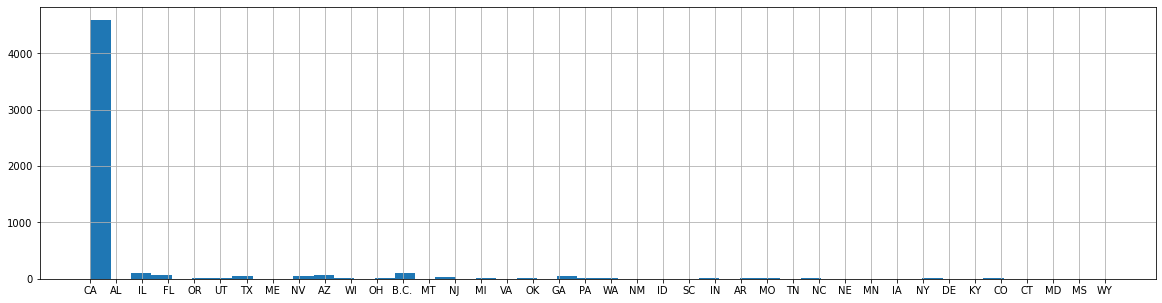

In [16]:
data['home_base_state'].hist(bins=50, figsize=(20,5))
plt.show()

### Findings:

We note that most real valued data are highly concentrated in smaller-valued regions with long tails to the right. Year is the only feature that seems more normally distributed. For categorical features, we note that operations are mostly done on work days, and are mostly based in California.

In [17]:
corr_matrix = data.corr() 
corr_matrix['label'].sort_values(ascending=False)

label                      1.000000
year                       0.534059
marketplace_loads          0.400645
marketplace_loads_atlas    0.361230
id_driver                  0.345887
brokerage_loads_atlas      0.327677
loads                      0.257802
num_trucks                 0.244607
marketplace_loads_otr      0.212335
brokerage_loads            0.182466
brokerage_loads_otr        0.126494
days_signup_to_approval   -0.221869
Name: label, dtype: float64

<AxesSubplot:>

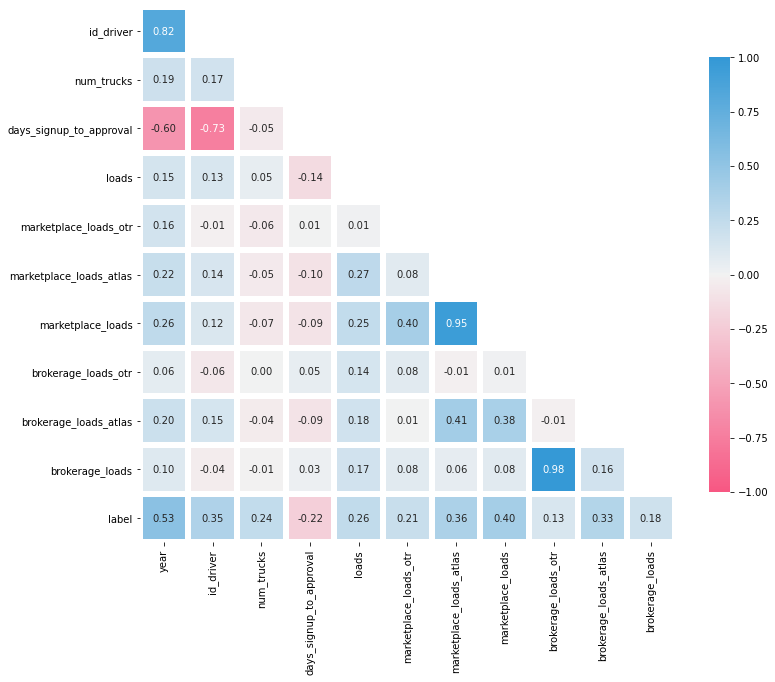

In [18]:
#credit: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool)) 
# adjust mask and df
mask = mask[1:, :-1]
corr = corr_matrix.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 240, 90, 60, as_cmap=True) 
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f",
linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)

### Findings:

- Label is most positively correlated to year, followed by marketplace_loads and marketplace_loads_atlas. In general, it has a positive correlation with all features except days_signup_to_approval.
- marketplace_loads is highly correlated with marketplace_loads_atlas; same thing between brokerage_loads and brokerage_loads_otr.
- id_driver is noticeably (positively) correlated with year; days_signup_to_approval is noticeably (negatively) correlated with year and id_driver.

## Part 4

Ideas for feature extraction:
- many null values in dim_preferred_lanes: change it to a binary variable indicating whether a perferred lane was specified (differentiate between drivers that did and didn't specify)

Features not needed:
- ts_signup and ts_first_approved: the period between signup and app